<h1 style="text-align: center;">Multi-Sensor Fusion for Enhanced Object Detection and Tracking in Dynamic Environments</h1>

**Step 1: Set Up the Environment**

Install the required libraries if not already installed:<br>
*pip install opencv-python numpy filterpy matplotlib*

**Step 2: Load the Modules Required**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
import csv

**Step 3: Load and Preprocess the Video Data**

1) Goal: Load video frames and preprocess them to enhance object detection and tracking.
2) Implementation: Gaussian blurring and edge detection (Canny) for preprocessing

In [3]:
# Load video
cap = cv2.VideoCapture('sample_video.mp4')

In [4]:
# Preprocess frame
def preprocess_frame(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

**Step 4: Object Detection Using Cascade Classifiers**

1) Goal: Detect objects (e.g., cars or pedestrians) using Haar Cascade Classifiers.
2) Output: Bounding boxes around detected objects

In [5]:
# Use a Haar cascade classifier for object detection
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_upperbody.xml')

In [6]:
def detect_objects(frame):
    objects = cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return objects

**Step 5: Object Tracking with Kalman Filter**

1) Goal: Use Kalman Filter to track detected objects across frames.
2) Output: Track the position of objects with predicted positions.

In [7]:
# Initialize Kalman Filter
def initialize_kalman(x, y):
    kf = KalmanFilter(dim_x=4, dim_z=2)
    kf.x = np.array([x, y, 0, 0])  # Initial position and velocity
    kf.F = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]])  # State transition matrix
    kf.H = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])  # Measurement function
    kf.P *= 1000.  # Initial covariance matrix
    kf.R = np.array([[5, 0], [0, 5]])  # Measurement noise
    return kf

**Step 6: Save Output Video: Save the video with detected and tracked objects for documentation.**

In [8]:
# Get video dimensions for output
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
output_video = cv2.VideoWriter('output_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 20, (width, height))

In [10]:
tracked_positions = []
trackers = []

# Process video for tracking
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess frame and detect objects
    blurred_frame = preprocess_frame(frame)
    objects = detect_objects(blurred_frame)
    if len(objects) == 0:
        print("No objects detected in this frame.")

    # Initialize Kalman filters for detected objects
    if len(trackers) < len(objects):
        for (x, y, w, h) in objects[len(trackers):]:
            trackers.append(initialize_kalman(x + w / 2, y + h / 2))

    frame_positions = []
    for i, tracker in enumerate(trackers):
        tracker.predict()
        if i < len(objects):
            x, y, w, h = objects[i]
            tracker.update([x + w / 2, y + h / 2])  # Update tracker with detected position

            pred_x, pred_y = int(tracker.x[0]), int(tracker.x[1])
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.circle(frame, (pred_x, pred_y), 5, (255, 0, 0), -1)

            frame_positions.append((pred_x, pred_y))

    tracked_positions.extend(frame_positions)
    output_video.write(frame)
    cv2.imshow('Tracking', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
output_video.release()
cv2.destroyAllWindows()

No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected in this frame.
No objects detected 

**Step 7: Graphs for Tracking Performance**

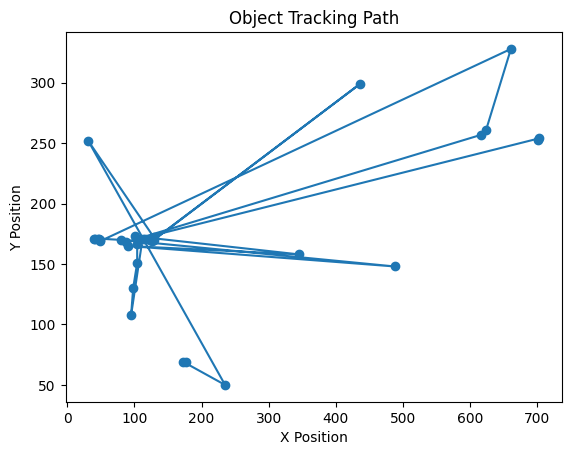

In [11]:
# Plot the tracking path after video processing
if tracked_positions:
    x_vals, y_vals = zip(*tracked_positions)
    plt.plot(x_vals, y_vals, marker='o')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Object Tracking Path')
    plt.show()
else:
    print("No objects were detected in the video, so there is no path to plot.")

In [12]:
# Reinitialize the video capture for CSV writing
cap = cv2.VideoCapture('sample_video.mp4')

**Step 8: Storing of Tracking Data**

In [13]:
# Write tracked positions to CSV
with open('tracking_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Frame', 'X', 'Y'])
    
    frame_num = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        processed_frame = preprocess_frame(frame)
        objects = detect_objects(processed_frame)

        for (x, y, w, h) in objects:
            writer.writerow([frame_num, x + w // 2, y + h // 2])
        
        frame_num += 1

cap.release()
print("Tracking data has been written to tracking_data.csv")

Tracking data has been written to tracking_data.csv
